In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings 
warnings.filterwarnings("ignore")

In [60]:
taxi_data = pd.read_csv('C:/Users/Javin/OneDrive/Desktop/lab-task/segmented_taxi_trajectory_1117.csv')

### Assumptions:
1. Gpsvalid = 0 means gps was not working properly hence the corresponding data for that index is faulty/erroneous
2. engine_acc = 0 means engine was idle or not working thus data for that index is erroneous
3. heading gives current direction pointing away from North(0,360) in clockwise manner
4. (variable)_x gives info about starting pt of taxi and (variable)_y gives info about ending pt 
5. speed = 0 just means car is stopped during that sampling time so is not considered as erroneous 

In [61]:
taxi_data = taxi_data[taxi_data['gpsvalid_x'] == 1]
taxi_data = taxi_data[taxi_data['gpsvalid_y'] == 1]
taxi_data = taxi_data[taxi_data['engine_acc_x'] == 1]
taxi_data = taxi_data[taxi_data['engine_acc_y'] == 1]

In [62]:
taxi_data['date_time_x'] = pd.to_datetime(taxi_data['date_time_x'], infer_datetime_format=True)
taxi_data['date_time_y'] = pd.to_datetime(taxi_data['date_time_y'], infer_datetime_format=True)

Checked all the columns were having same value in all rows without any erroneous data before dropping them for easier table lookup 

In [63]:
taxi_data = taxi_data.drop(['geometry_x'], axis=1) # redundant gps loc
taxi_data = taxi_data.drop(['geometry_y'], axis=1) # redundant gps loc
taxi_data = taxi_data.drop(['engine_acc_x'], axis=1) # always 1
taxi_data = taxi_data.drop(['engine_acc_y'], axis=1) # always 1
taxi_data = taxi_data.drop(['gpsvalid_x'], axis=1) # always 1
taxi_data = taxi_data.drop(['gpsvalid_y'], axis=1) # always 1
taxi_data = taxi_data.drop(['trip_point_x'], axis=1) # always starts
taxi_data = taxi_data.drop(['trip_point_y'], axis=1) # always ends
taxi_data = taxi_data.drop(['for_hire_light_x'], axis=1) # always 0
taxi_data = taxi_data.drop(['for_hire_light_y'], axis=1) # always 1

In [64]:
taxi_data.head()

,VehicleID_x,lat_x,lon_x,date_time_x,speed_x,heading_x,trajectory_id,VehicleID_y,lat_y,lon_y,date_time_y,speed_y,heading_y
0,++DSqYQ5x328LHUqejEnMt1Ari0,13.64769,100.78991,2019-04-01 12:04:05,3,177,++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401120405,++DSqYQ5x328LHUqejEnMt1Ari0,13.65319,100.78381,2019-04-01 12:10:05,26,141
1,++DSqYQ5x328LHUqejEnMt1Ari0,13.64767,100.67939,2019-04-01 12:37:05,5,189,++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401123705,++DSqYQ5x328LHUqejEnMt1Ari0,13.67083,100.67389,2019-04-01 13:02:05,10,289
2,++DSqYQ5x328LHUqejEnMt1Ari0,13.65371,100.67874,2019-04-01 13:17:05,0,184,++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401131705,++DSqYQ5x328LHUqejEnMt1Ari0,13.69173,100.67092,2019-04-01 13:39:05,40,207
3,++DSqYQ5x328LHUqejEnMt1Ari0,13.68211,100.61034,2019-04-01 14:01:05,16,9,++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401140105,++DSqYQ5x328LHUqejEnMt1Ari0,13.71405,100.59269,2019-04-01 14:16:05,7,309
4,++DSqYQ5x328LHUqejEnMt1Ari0,13.74752,100.57965,2019-04-01 14:43:05,0,117,++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401144305,++DSqYQ5x328LHUqejEnMt1Ari0,13.74763,100.59861,2019-04-01 14:58:05,0,201


In [65]:
taxi_data.tail()

,VehicleID_x,lat_x,lon_x,date_time_x,speed_x,heading_x,trajectory_id,VehicleID_y,lat_y,lon_y,date_time_y,speed_y,heading_y
239757,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.79392,100.71340,1963-07-17 12:43:27,17,327,//wVqd1wQ3ygnNSpDFZ1PV8PxrE_trip_19630717124327,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.77354,100.66722,1963-07-17 13:13:15,24,258
239758,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.74967,100.64914,1963-07-17 13:51:15,59,301,//wVqd1wQ3ygnNSpDFZ1PV8PxrE_trip_19630717135115,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.76105,100.63039,1963-07-17 14:08:15,37,85
239759,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.75243,100.63416,1963-07-17 15:22:17,35,102,//wVqd1wQ3ygnNSpDFZ1PV8PxrE_trip_19630717152217,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.76639,100.64610,1963-07-17 15:41:17,26,87
239760,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.77795,100.65685,1963-07-17 15:48:17,0,7,//wVqd1wQ3ygnNSpDFZ1PV8PxrE_trip_19630717154817,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.76777,100.65056,1963-07-17 16:07:43,37,226
239761,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.76953,100.58494,1963-07-17 16:46:43,8,177,//wVqd1wQ3ygnNSpDFZ1PV8PxrE_trip_19630717164643,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.77092,100.60772,1963-07-17 16:56:43,12,22


In [66]:
taxi_data.shape

(209507, 13)

In [67]:
taxi_data.columns

Index(['VehicleID_x', 'lat_x', 'lon_x', 'date_time_x', 'speed_x', 'heading_x',
       'trajectory_id', 'VehicleID_y', 'lat_y', 'lon_y', 'date_time_y',
       'speed_y', 'heading_y'],
      dtype='object')

In [68]:
taxi_data.describe()

,lat_x,lon_x,speed_x,heading_x,lat_y,lon_y,speed_y,heading_y
count,209507.000000,209507.000000,209507.000000,209507.000000,209507.000000,209507.000000,209507.00000,209507.000000
mean,13.737800,100.577239,13.523801,177.466276,13.738122,100.575027,21.16031,176.381620
std,0.080243,0.096693,16.933879,104.192466,0.077275,0.092191,21.56059,104.501109
min,13.486930,100.330530,0.000000,0.000000,13.492040,100.330460,0.00000,0.000000
25%,13.689800,100.512690,0.000000,90.000000,13.691580,100.513045,0.00000,90.000000
50%,13.740230,100.570390,7.000000,183.000000,13.740480,100.567210,16.00000,183.000000
75%,13.788460,100.635990,22.000000,270.000000,13.787010,100.631405,36.00000,270.000000
max,13.955110,100.945650,132.000000,360.000000,13.952360,100.931370,160.00000,360.000000


In [69]:
taxi_data.isnull().sum()

VehicleID_x      0
lat_x            0
lon_x            0
date_time_x      0
speed_x          0
heading_x        0
trajectory_id    0
VehicleID_y      0
lat_y            0
lon_y            0
date_time_y      0
speed_y          0
heading_y        0
dtype: int64

In [70]:
taxi_data.nunique()

VehicleID_x        3785
lat_x             37082
lon_x             43025
date_time_x      170062
speed_x             115
heading_x           361
trajectory_id    209507
VehicleID_y        3785
lat_y             36174
lon_y             41143
date_time_y      170729
speed_y             127
heading_y           361
dtype: int64

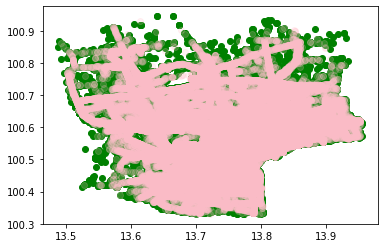

In [71]:
plt.scatter(x=taxi_data['lat_x'], y=taxi_data['lon_x'], color='green')
plt.scatter(x=taxi_data['lat_y'], y=taxi_data['lon_y'], color='pink', alpha=0.2)
plt.show()

In [111]:
taxi_data['hour_x'] = pd.to_datetime(taxi_data['date_time_x']).dt.hour
taxi_data['hour_y'] = pd.to_datetime(taxi_data['date_time_y']).dt.hour
taxi_data['day_x'] = pd.to_datetime(taxi_data['date_time_x']).dt.day_name()
taxi_data['day_y'] = pd.to_datetime(taxi_data['date_time_y']).dt.day_name()

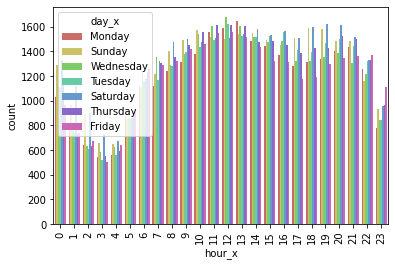

<Figure size 10800x10800 with 0 Axes>

In [119]:
sns.countplot('hour_x', hue='day_x', data=taxi_data, palette='hls')
plt.xticks(rotation = 90)
plt.figure(figsize=(150,150))
plt.show()

Weekday Rush hour starts from 8am to 8pm with increased traffic on weekends from 4pm to 9pm

### K-means clustering of pick-up points

In [81]:
taxi_data_pickup = taxi_data[taxi_data.columns[1:3]]
taxi_data_pickup

,lat_x,lon_x
0,13.64769,100.78991
1,13.64767,100.67939
2,13.65371,100.67874
3,13.68211,100.61034
4,13.74752,100.57965
...,...,...
239757,13.79392,100.71340
239758,13.74967,100.64914
239759,13.75243,100.63416
239760,13.77795,100.65685


Elbow curve method is used to find optimal number of k_means cluster required for proper segregation

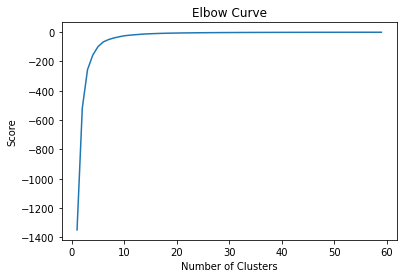

In [72]:
from sklearn.cluster import KMeans 
K_clusters = range(1,60)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = taxi_data_pickup[['lat_x']]
X_axis = taxi_data_pickup[['lon_x']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [99]:
kmeans = KMeans(n_clusters = 9, init ='k-means++') #selecting 9 as after 9 delta in score for increasing cluter no is very small
kmeans.fit(taxi_data_pickup[taxi_data_pickup.columns[0:2]]) # Compute k-means clustering.
taxi_data_pickup['cluster_label'] = kmeans.fit_predict(taxi_data_pickup[taxi_data_pickup.columns[0:2]])
centers_pickup = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels_pickup = kmeans.predict(taxi_data_pickup[taxi_data_pickup.columns[0:2]]) # Labels of each point
taxi_data_pickup.head(10)

,lat_x,lon_x,cluster_label
0,13.64769,100.78991,8
1,13.64767,100.67939,2
2,13.65371,100.67874,2
3,13.68211,100.61034,2
4,13.74752,100.57965,1
5,13.87164,100.72170,6
6,13.89336,100.63122,6
7,13.89613,100.66283,6
9,13.69981,100.61654,1
10,13.73399,100.49075,4


(O/p of k-means cluster graph at end of notebook)

### K-means clustering of drop points

In [90]:
taxi_data_drop = taxi_data[taxi_data.columns[8:10]]
taxi_data_drop

,lat_y,lon_y
0,13.65319,100.78381
1,13.67083,100.67389
2,13.69173,100.67092
3,13.71405,100.59269
4,13.74763,100.59861
...,...,...
239757,13.77354,100.66722
239758,13.76105,100.63039
239759,13.76639,100.64610
239760,13.76777,100.65056


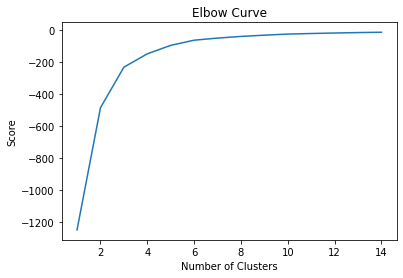

In [92]:
from sklearn.cluster import KMeans 
K_clusters = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = taxi_data_drop[['lat_y']]
X_axis = taxi_data_drop[['lon_y']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [109]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(taxi_data_drop[taxi_data_drop.columns[0:2]]) # Compute k-means clustering.
taxi_data_drop['cluster_label'] = kmeans.fit_predict(taxi_data_drop[taxi_data_drop.columns[0:2]])
centers_drop = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels_drop = kmeans.predict(taxi_data_drop[taxi_data_drop.columns[0:2]]) # Labels of each point
taxi_data_pickup.head(10)

,lat_x,lon_x,cluster_label
0,13.64769,100.78991,8
1,13.64767,100.67939,2
2,13.65371,100.67874,2
3,13.68211,100.61034,2
4,13.74752,100.57965,1
5,13.87164,100.72170,6
6,13.89336,100.63122,6
7,13.89613,100.66283,6
9,13.69981,100.61654,1
10,13.73399,100.49075,4


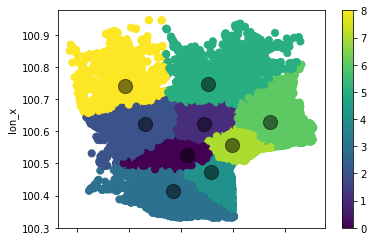

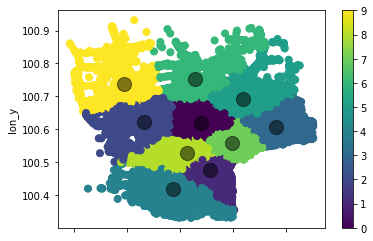

In [110]:
taxi_data_pickup.plot.scatter(x = 'lat_x', y = 'lon_x', c=labels_pickup, s=50, cmap='viridis')
plt.scatter(centers_pickup[:, 0], centers_pickup[:, 1], c='black', s=200, alpha=0.5)
taxi_data_drop.plot.scatter(x = 'lat_y', y = 'lon_y', c=labels_drop, s=50, cmap='viridis')
plt.scatter(centers_drop[:, 0], centers_drop[:, 1], c='black', s=200, alpha=0.5)

This shows that taxis are situated nearby pickup spots however the routes of taxis are somewhat inefficient as in drop-location K means plot has alot of overlapping points